In [1]:
import pandas as pd
df=pd.read_csv('F:\React_projs2\DOM_scraping_major_proj\combined_df.csv')
df

,Unnamed: 0,url,size,serial_no,similarity_score,num_forms,has_login_form,num_scripts,has_external_scripts,num_hyperlinks,num_external_hyperlinks,num_js_events,isPhishing
0,0,https://beneficioauxbrasil.com,246,1,42.324949,0,0,1,1,0,0,0,1
1,1,https://secure-ads-manage.miracle-chain.com/bu...,810,2,69.116352,0,0,1,0,0,0,0,1
2,2,https://pub-3ef4c4f0dccc42ab9f9604f18c4b3622.r...,14108,19,10.240240,0,0,0,0,1,1,0,1
3,3,https://googleweblight.com/i?u=https://pub-3ef...,14108,20,10.240240,0,0,0,0,1,1,0,1
4,4,https://00-ird.weebly.com/,34304,22,89.400942,1,0,28,1,5,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1664,847,https://www.auction.co.kr,171679,1029,42.680443,1,0,40,1,224,155,0,0
1665,848,https://www.bitfinex.com,704630,1030,35.194682,0,0,12,1,92,41,0,0
1666,849,https://www.viva.co.id,159458,1031,32.729541,0,0,56,1,286,268,0,0
1667,850,https://www.unity3d.com,293,1032,0.878553,0,0,0,0,0,0,0,0


In [2]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,url,size,serial_no,similarity_score,num_forms,has_login_form,num_scripts,has_external_scripts,num_hyperlinks,num_external_hyperlinks,num_js_events,isPhishing
0,https://beneficioauxbrasil.com,246,1,42.324949,0,0,1,1,0,0,0,1
1,https://secure-ads-manage.miracle-chain.com/bu...,810,2,69.116352,0,0,1,0,0,0,0,1
2,https://pub-3ef4c4f0dccc42ab9f9604f18c4b3622.r...,14108,19,10.240240,0,0,0,0,1,1,0,1
3,https://googleweblight.com/i?u=https://pub-3ef...,14108,20,10.240240,0,0,0,0,1,1,0,1
4,https://00-ird.weebly.com/,34304,22,89.400942,1,0,28,1,5,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1664,https://www.auction.co.kr,171679,1029,42.680443,1,0,40,1,224,155,0,0
1665,https://www.bitfinex.com,704630,1030,35.194682,0,0,12,1,92,41,0,0
1666,https://www.viva.co.id,159458,1031,32.729541,0,0,56,1,286,268,0,0
1667,https://www.unity3d.com,293,1032,0.878553,0,0,0,0,0,0,0,0


In [5]:
pip install WordCloud


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for WordCloud from https://files.pythonhosted.org/packages/d0/67/ebbc7e0c6da1753d7c30c2ca47c6bd11dbf2259cfa9c98151f4ab3d8b950/wordcloud-1.9.3-cp39-cp39-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.6 kB ? eta -:--:--
   --------- ------------------------------ 71.7/300.6 kB 1.3 MB/s eta 0:00:01
   ------------------- -------------------- 143.4/300.6 kB 1.4 MB/s eta 0:00:01
   ----------------------------- ---------- 225.3/300.6 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.6 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 300.6/300.6 kB 1.3 MB/s eta 0:00:00


In [6]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from colorama import Fore
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from tld import get_tld, is_tld
from wordcloud import WordCloud

In [7]:
data=df

In [8]:
def process_tld(url):
    try:
#         Extract the top level domain (TLD) from the URL given
        res = get_tld(url, as_object = True, fail_silently=False,fix_protocol=True)
        pri_domain= res.parsed_url.netloc
    except :
        pri_domain= None
    return pri_domain

feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
for a in feature:
    data[a] = data['url'].apply(lambda i: i.count(a))


def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
    
def httpSecure(url):
    htp = urlparse(url).scheme #It supports the following URL schemes: file , ftp , gopher , hdl , 
                               #http , https ... from urllib.parse
    match = str(htp)
    if match=='https':
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
    
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
data['digits']= data['url'].apply(lambda i: digit_count(i))

def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

def Shortining_Service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
    
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4 with port
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
        '([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
        '((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)', url)  # Ipv6
    if match:
        return 1
    else:
        return 0
    


In [10]:
data['url_len'] = data['url'].apply(lambda x: len(str(x)))
data['domain'] = data['url'].apply(lambda i: process_tld(i))
data['abnormal_url'] = data['url'].apply(lambda i: abnormal_url(i))
data['https'] = data['url'].apply(lambda i: httpSecure(i))
data['letters']= data['url'].apply(lambda i: letter_count(i))
data['Shortining_Service'] = data['url'].apply(lambda x: Shortining_Service(x))
data['having_ip_address'] = data['url'].apply(lambda i: having_ip_address(i))


In [11]:
data

,url,size,serial_no,similarity_score,num_forms,has_login_form,num_scripts,has_external_scripts,num_hyperlinks,num_external_hyperlinks,...,",",//,digits,url_len,domain,abnormal_url,https,letters,Shortining_Service,having_ip_address
0,https://beneficioauxbrasil.com,246,1,42.324949,0,0,1,1,0,0,...,0,1,0,30,beneficioauxbrasil.com,1,1,26,0,0
1,https://secure-ads-manage.miracle-chain.com/bu...,810,2,69.116352,0,0,1,0,0,0,...,0,1,0,61,secure-ads-manage.miracle-chain.com,1,1,50,0,0
2,https://pub-3ef4c4f0dccc42ab9f9604f18c4b3622.r...,14108,19,10.240240,0,0,0,0,1,1,...,0,1,23,68,pub-3ef4c4f0dccc42ab9f9604f18c4b3622.r2.dev,1,1,37,0,0
3,https://googleweblight.com/i?u=https://pub-3ef...,14108,20,10.240240,0,0,0,0,1,1,...,0,2,23,99,googleweblight.com,1,1,61,1,0
4,https://00-ird.weebly.com/,34304,22,89.400942,1,0,28,1,5,1,...,0,1,2,26,00-ird.weebly.com,1,1,17,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1664,https://www.auction.co.kr,171679,1029,42.680443,1,0,40,1,224,155,...,0,1,0,25,www.auction.co.kr,1,1,19,0,0
1665,https://www.bitfinex.com,704630,1030,35.194682,0,0,12,1,92,41,...,0,1,0,24,www.bitfinex.com,1,1,19,1,0
1666,https://www.viva.co.id,159458,1031,32.729541,0,0,56,1,286,268,...,0,1,0,22,www.viva.co.id,1,1,16,0,0
1667,https://www.unity3d.com,293,1032,0.878553,0,0,0,0,0,0,...,0,1,1,23,www.unity3d.com,1,1,17,0,0


In [14]:
X = data.drop(['url','domain','url','serial_no','isPhishing'],axis=1)#,'type_code'
y = data['isPhishing']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url                      1669 non-null   object 
 1   size                     1669 non-null   int64  
 2   serial_no                1669 non-null   int64  
 3   similarity_score         1669 non-null   float64
 4   num_forms                1669 non-null   int64  
 5   has_login_form           1669 non-null   int64  
 6   num_scripts              1669 non-null   int64  
 7   has_external_scripts     1669 non-null   int64  
 8   num_hyperlinks           1669 non-null   int64  
 9   num_external_hyperlinks  1669 non-null   int64  
 10  num_js_events            1669 non-null   int64  
 11  isPhishing               1669 non-null   int64  
 12  @                        1669 non-null   int64  
 13  ?                        1669 non-null   int64  
 14  -                       

<Axes: >

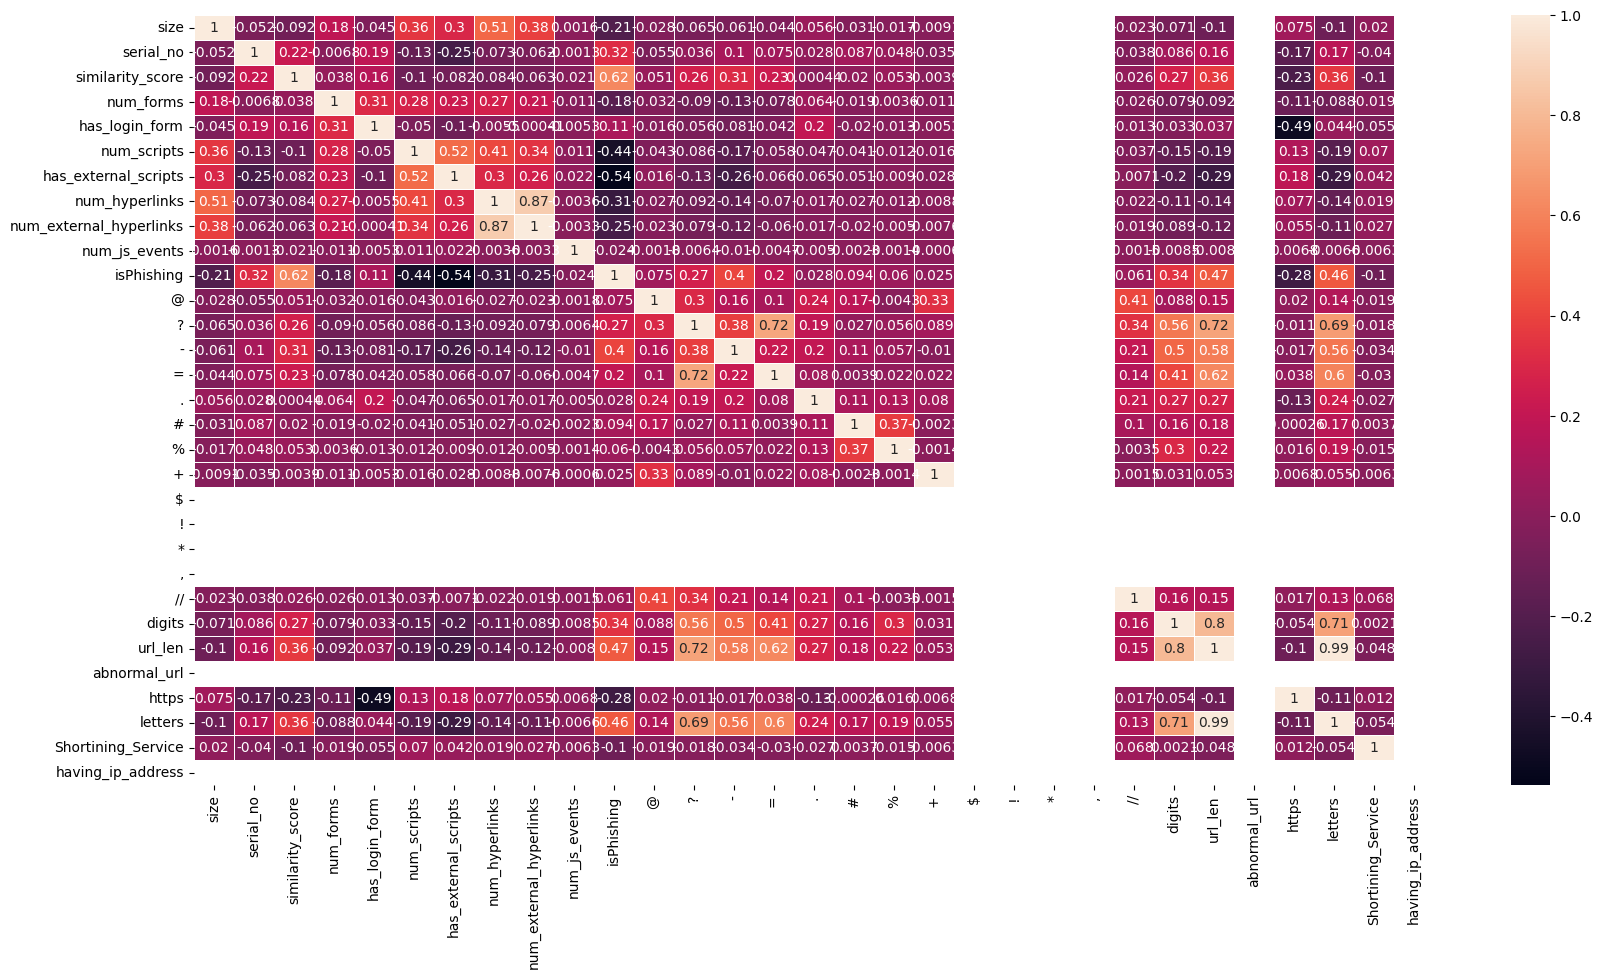

In [18]:
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
data_numeric = data.drop(columns=non_numeric_columns)
plt.figure(figsize=(20, 10))
sns.heatmap(data_numeric.corr(), linewidths=.5,annot=True)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
log_reg = LogisticRegression(max_iter=10000)
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier()
rf = RandomForestClassifier()

# Train classifiers
log_reg.fit(X_train, y_train)
knn.fit(X_train, y_train)
dtree.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Make predictions for test data
y_pred_log_reg      = log_reg.predict(X_test)
y_pred_knn          = knn.predict(X_test)
y_pred_dtree        = dtree.predict(X_test)
y_pred_rf           = rf.predict(X_test)

# make predictions for train data
y_train_pred_log_reg    = log_reg.predict(X_train)
y_train_pred_knn        = knn.predict(X_train)
y_train_pred_dtree      = dtree.predict(X_train)
y_train_pred_rf         = rf.predict(X_train)



In [20]:
def makeTable(title,y_test,y_pred_log_reg,y_pred_knn    ,y_pred_dtree  ,y_pred_rf ):

    metrics = {
        'metrics':['accuracy', 'precision', 'recall', 'f1_score', 'confusion'],
        'Logistic Regression': [
    accuracy_score(y_test, y_pred_log_reg),
    precision_score(y_test, y_pred_log_reg,average='macro'),
    recall_score(y_test, y_pred_log_reg,average='macro'),
    f1_score(y_test, y_pred_log_reg,average='macro'),
    confusion_matrix(y_test, y_pred_log_reg)
        ],

            'K-Nearest Neighbors': [
    accuracy_score(y_test, y_pred_knn),
    precision_score(y_test, y_pred_knn,average='macro'),
    recall_score(y_test, y_pred_knn,average='macro'),
    f1_score(y_test, y_pred_knn,average='macro'),
    confusion_matrix(y_test, y_pred_knn)
        ],

            'Decision Tree':[ 
    accuracy_score(y_test, y_pred_dtree),
    precision_score(y_test, y_pred_dtree,average='macro'),
    recall_score(y_test, y_pred_dtree,average='macro'),
    f1_score(y_test, y_pred_dtree,average='macro'),
    confusion_matrix(y_test, y_pred_dtree)
        ],

        'Random Forest': [
    accuracy_score(y_test, y_pred_rf),
    precision_score(y_test, y_pred_rf,average='macro'),
    recall_score(y_test, y_pred_rf,average='macro'),
    f1_score(y_test, y_pred_rf,average='macro'),
    confusion_matrix(y_test, y_pred_rf)
        ]
    }

    # Display results in a tabular format
    results_df = pd.DataFrame(metrics)
    results_df.title = title

    return results_df



In [22]:
table=makeTable("Testing Dataset metrics",y_test,y_pred_log_reg,y_pred_knn,y_pred_dtree,y_pred_rf )
print(table.title)
table

Testing Dataset metrics


,metrics,Logistic Regression,K-Nearest Neighbors,Decision Tree,Random Forest
0,accuracy,0.814371,0.844311,0.994012,0.98503
1,precision,0.845698,0.844792,0.994048,0.985064
2,recall,0.813468,0.844198,0.994048,0.985011
3,f1_score,0.80976,0.844222,0.994012,0.985029
4,confusion,"[[110, 56], [6, 162]]","[[137, 29], [23, 145]]","[[166, 0], [2, 166]]","[[163, 3], [2, 166]]"


## Testing, Attention Please, feel the tension soon as someone mentions me

In [28]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import TimeoutException, WebDriverException
import os
def get_dom1(url):
# Configure Chrome options
    chrome_options = Options()
    chrome_options.add_argument("--headless")  # Run Chrome in headless mode (no GUI)
    chrome_options.add_argument("--disable-gpu")  # Disable GPU acceleration

# Initialize Chrome WebDriver
    driver = webdriver.Chrome(options=chrome_options)
    driver.set_page_load_timeout(10)  # Timeout set to 10 seconds

# Create a directory to save DOM tree file        # Open the URL with a timeout
    driver.get(url)

        # Get the DOM tree
    dom_tree = driver.page_source
    return dom_tree

In [29]:
import requests
from bs4 import BeautifulSoup
import numpy as np

def get(url):
    results = []
    
    # Fetch HTML content
    
    
    # Parse HTML
    html_content = get_dom1(url)
    results.append(len(html_content))
    # Call tf_idf_tags and append result to list
    tf_idf_result = tf_idf_tags(html_content)
    
    
    # Call cal_similarity_score and append result to list
    similarity_score = cal_similarity_score(tf_idf_result)  # Assuming tf_idf_result is used here
    results.append(similarity_score)
    
    # Call extract_features and append result to list
    features = extract_features(html_content)
    if(features['has_login_form']):
        features['has_login_form']=1
    else:
         features['has_login_form']=0
    if(features['has_external_scripts']):
        features['has_external_scripts']=1
    else:
         features['has_external_scripts']=0
    
    results.append(features['num_forms'])
    results.append(features['has_login_form'])
    results.append(features['num_scripts'])
    results.append(features['has_external_scripts'])
    results.append(features['num_hyperlinks'])
    results.append(features['num_external_hyperlinks'])
    results.append(features['num_js_events'])
    feature1 = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
    for a in feature1:
        features[a] = url.count(a)
        results.append(features[a])
    results.append(digit_count(url))
    results.append(len(url))
    results.append(abnormal_url(url))
    results.append(httpSecure(url))
    results.append(letter_count(url))
    results.append(Shortining_Service(url))
    results.append(having_ip_address(url))
    return results

# Example usage
url = "https://twitter.com/home?lang=en"
results_list = get(url)



In [31]:
import numpy as np
X = np.array(results_list).reshape(1, -1)
y = dtree.predict(X)
print(y)

[0]


c:\Users\Aarya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [36]:
t=get('https://axieinfinity-game.ru/')
X = np.array(t).reshape(1, -1)
y = dtree.predict(X)
print(y)

[0]


c:\Users\Aarya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


https://cxtemapp.com/


In [27]:
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
def read_html_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Function to compute TF-IDF scores of HTML tags from a file
def tf_idf_tags(html_content):
    # Check if HTML content is empty
    if not html_content.strip():
        return {}  # Return an empty dictionary if content is empty

    # Parse the HTML content
    soup = BeautifulSoup(html_content, 'html.parser')

    # Extract tags from the DOM tree
    tags = [tag.name for tag in soup.find_all()]

    # Convert tags to string for TF-IDF computation
    tag_string = ' '.join(tags)

    # Compute TF-IDF scores
    tfidf = TfidfVectorizer()
    tfidf_matrix = tfidf.fit_transform([tag_string])

    # Get feature names (tags)
    feature_names = tfidf.get_feature_names_out()

    # Create a dictionary to store TF-IDF scores for each tag
    tag_tfidf_scores = {}
    for tag, score in zip(feature_names, tfidf_matrix.toarray()[0]):
        tag_tfidf_scores[tag] = score
    return tag_tfidf_scores
file_path="F:\\React_projs2\DOM_scraping_major_proj\\dom_trees_new_phish\\179_dom_tree.html"
html_content1 = read_html_file(file_path)
res=tf_idf_tags(html_content1)
def cal_similarity_score(tf_idf_tag):
    #file_path1 = "F://React_projs2//DOM_scraping_major_proj//dom_trees_new_phish//" + str(idx) + "_dom_tree.html"
    #tf_idf_tag = tf_idf_tags(file_path1)

    # Check if tf_idf_tag is empty
    if not tf_idf_tag:
        return 0  # Return 0 similarity score if tf_idf_tag is empty
   
    # Get tags from the reference document
    tags = set(res.keys()).union(set(tf_idf_tag.keys()))

    # Compute TF-IDF vectors for both documents
    vector_page1 = np.array([res.get(tag, 0) for tag in tags]).reshape(1, -1)
    vector_page2 = np.array([tf_idf_tag.get(tag, 0) for tag in tags]).reshape(1, -1)

    # Compute cosine similarity
    similarity_score = cosine_similarity(vector_page1, vector_page2)[0][0]
    return similarity_score
import re
def extract_features(html_content):
    features = {}
    
    # Parse HTML content
    soup = BeautifulSoup(html_content, 'html.parser')
    
    # Extract URL features
    url = soup.find('meta', attrs={'property': 'og:url'})
    #features['url_length'] = len(url['content']) if url else 0
    
    # Extract form features
    forms = soup.find_all('form')
    features['num_forms'] = len(forms)
    features['has_login_form'] = any(['login' in form.get('action', '').lower() for form in forms])
    
    # Extract script features
    scripts = soup.find_all('script')
    features['num_scripts'] = len(scripts)
    features['has_external_scripts'] = any(['http' in script.get('src', '') for script in scripts])
    
    # Extract hyperlink features
    hyperlinks = soup.find_all('a', href=True)
    features['num_hyperlinks'] = len(hyperlinks)
    features['num_external_hyperlinks'] = sum(1 for link in hyperlinks if 'http' in link['href'])
    
    # Extract JavaScript event features
    js_events = soup.find_all(re.compile('^on'))
    features['num_js_events'] = len(js_events)
    
    return features

In [25]:
X_train.columns

Index(['size', 'similarity_score', 'num_forms', 'has_login_form',
       'num_scripts', 'has_external_scripts', 'num_hyperlinks',
       'num_external_hyperlinks', 'num_js_events', '@', '?', '-', '=', '.',
       '#', '%', '+', '$', '!', '*', ',', '//', 'digits', 'url_len',
       'abnormal_url', 'https', 'letters', 'Shortining_Service',
       'having_ip_address'],
      dtype='object')

In [37]:
import pickle
model_filename = 'F:\\React_projs2\\DOM_scraping_major_proj\\decision_tree_model_combined.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(dtree, file)

print(f"Decision Tree model saved to {model_filename}")

Decision Tree model saved to F:\React_projs2\DOM_scraping_major_proj\decision_tree_model_combined.pkl


In [38]:
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)
t=get('https://cxtemapp.com/')
X = np.array(t).reshape(1, -1)
y = loaded_model.predict(X)
print(y)

[1]


c:\Users\Aarya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
